<a href="https://colab.research.google.com/github/drscook/Billiards2020_with_Jax/blob/master/data_science_20_21_notes_20_08_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Intro to Linear Algebra
## Class Notes 2020-08-26
## Data Science (masters)
## Math 5364 & 5366, Fall 20 & Spring 21
## Tarleton State University
## Dr. Scott Cook

# Goal
Understand Principal Components Analysis

### Summary
*Dimensionality reduction* is an attempt to reduce the number of features of a dataset while losing as little information as possible.

## Example

In [ ]:
import numpy as np
import pandas as pd

n = 20
seed = 42
rng = np.random.default_rng(seed)
df = pd.DataFrame()
df['x'] = (rng.random(n)*2)-1
noise = rng.normal(size=20) / 20
df['y'] =  (df['x'] + noise) / 2
lim = np.array([df.min(axis=0), df.max(axis=0)]).T
# lim = [(-1,1), (-0.5,0.5)]
display(df)

,x,y
0,0.547912,0.269334
1,-0.122243,-0.078145
2,0.717196,0.389161
3,0.394736,0.193505
4,-0.811645,-0.416531
5,0.951245,0.466819
6,0.522279,0.274447
7,0.572129,0.295200
8,-0.743773,-0.361568
9,-0.099228,-0.038844


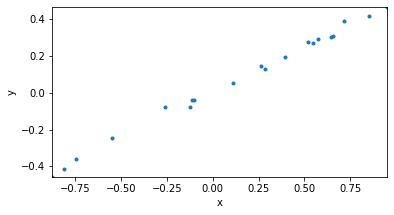

In [ ]:
import matplotlib.pyplot as plt
def make_fig(df):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(lim[0])
    ax.set_ylim(lim[1])
    x, y = df.columns[:2]
    ax.plot(df[x], df[y], '.');    
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return fig, ax

fig, ax = make_fig(df)

This data is 2-dimension (2 columns), but clearly this data lies almost entirely in a 1-dimensional subspace.  With a little work, we can replace the 2-column dataset by a 1-column dataset that is essentially equivalent.

This process is called Principal Components Analysis.  It searches for a "change of coordiates" that is aligned to the data, as depicted below.

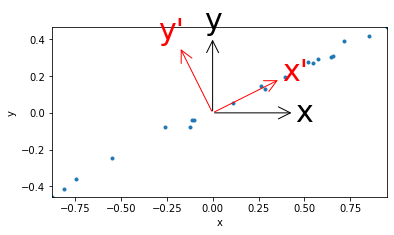

In [ ]:
standard_basis = [[1, 0],
                  [0, 1]]

new_basis = [[1, 0.5],
             [-0.5, 1]]

def plot_basis(basis, clr='black', mark="'"):
    d = {'arrowprops':dict(arrowstyle="<-",color=clr), 'color':clr, 'fontsize':30, 'ha':'center', 'va':'center'}
    # rescale basis to fit fig nicely
    b = np.array(basis)
    b = b / np.linalg.norm(b, axis=1, keepdims=True) * 0.5
    ax.annotate(f"x{mark}", xy=(0, 0), xytext=b[0], **d)
    ax.annotate(f"y{mark}", xy=(0, 0), xytext=b[1], **d)
    ax.set_aspect('equal')

fig, ax = make_fig(df)
plot_basis(standard_basis, clr='black' , mark="")
plot_basis(new_basis, clr='red')

Observe that the red "new_basis" came out of thin air.  Our questions are
1. Where did new_basis come from?
1. How do we generalize this process to high-dimensional spaces that we can't visualize as easily.

A "black-box" answer to both question is [scikit-learn](https://scikit-learn.org/stable/index.html).

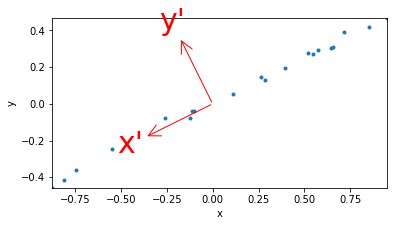

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_basis = pca.components_.T

fig, ax = make_fig(df)
plot_basis(pca_basis, clr='red')

But, we won't settle for black boxes.  Let's learn about [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

I wrote a function named "my_PCA" that implements the PCA derivation [here](https://en.wikipedia.org/wiki/Principal_component_analysis#Computing_PCA_using_the_covariance_method)
- input = dataframe
- output = dictionary containing:
    - u, B, C, V, D (defined at link above)
    - df: the PCA transformed dataset B@V

The last line of the cell below imports my_PCA from a file you DON'T have.  Your second homework assignment is to write your own my_PCA.

In [ ]:
preferred_path = f"My Drive/active/m53646-data-science-20-21/notes"   # your preferred google drive path
import os
import google.colab
root_path = "/content/drive/"
google.colab.drive.mount(root_path)
your_path = os.path.join(root_path, preferred_path)  # path to folder for your local
%cd "{your_path}"
%run -i data-science-20-21-notes-20-08-26-helper.ipynb

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/active/m53646-data-science-20-21/notes


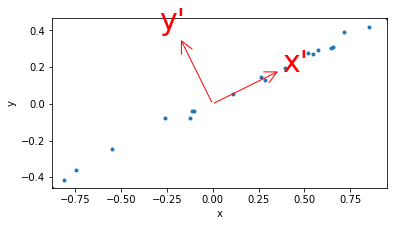

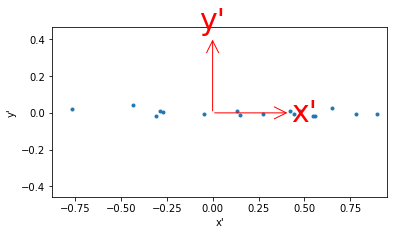

The matrices below should be the same.  The first one, C, is the covariance matrix; the second is C's eigen-decomposition VDV^-1
          x         y
x  0.323828  0.160227
y  0.160227  0.079665

[[0.32382828 0.16022658]
 [0.16022658 0.07966456]]


,x',y'
0,0.444199,-0.004895
1,-0.310556,-0.018853
2,0.649079,0.027354
3,0.273281,-0.004866
4,-1.078522,-0.016120
5,0.893280,-0.006930
6,0.423499,0.011063
7,0.477380,0.007536
8,-0.993307,0.003010
9,-0.272489,0.006151


In [ ]:
pca = my_PCA(df)
V, D = pca['V'], pca['D']
ebasis = V.T
fig, ax = make_fig(df)
plot_basis(ebasis, clr='red')

fig, ax = make_fig(pca['df'])
plot_basis(standard_basis, clr='red')
plt.show()

print(f"The matrices below should be the same.  The first one, C, is the covariance matrix; the second is C's eigen-decomposition VDV^-1")
P = V @ D @ np.linalg.inv(V)
print(pca['C'])
print()
print(P)

display(pca['df'])

In [ ]:
explained_variance = D.diagonal()
explained_variance_cumumlative = explained_variance.cumsum()
variance_total = explained_variance_cumumlative[-1]
explained_variance_ratio = explained_variance / variance_total
explained_variance_ratio_cumulative = explained_variance_ratio.cumsum()
print(explained_variance_ratio_cumulative)

## Here's a shorter version
explained_variance = D.diagonal()
explained_variance_ratio_cumulative = explained_variance.cumsum() / explained_variance.sum()
print(explained_variance_ratio_cumulative)

[0.99923114 1.        ]
[0.99923114 1.        ]


In [ ]:
reduced_dim = 1
df_reduced = pca['df'].iloc[:,:reduced_dim]
df_reduced

,x'
0,0.444199
1,-0.310556
2,0.649079
3,0.273281
4,-1.078522
5,0.893280
6,0.423499
7,0.477380
8,-0.993307
9,-0.272489


# Intro to Linear Algebra


## Intro to Complex numbers

- def: $i = \sqrt{-1}$
- def: a *complex number* has the form $z=x+iy$ where $x$ and $y$ are real numbers.
- def: The *conjugate* of a complex number $z=x+iy$ is $\bar{z}=x-iy$.  The *conjugate* of a matrix is the conjugate of all the entries.
- def: The *modulus (or absolute value or magnitude* of a complex numbers $z=x+iy$ is $|z| = \sqrt{z\bar{z}}=\sqrt{x^2+y^2}$


## Basic Linear Algebra Definitions

The term *vector space* is defined by a bunch of axioms listed [here](https://en.wikipedia.org/wiki/Vector_space#Definition).
Notation:
- Let $V$ denote a vector space over a field $F$
- Things with arrows like $\vec{v}$ are vectors (elements of $V$)
- Things without arrows like $k$ are scalares (elements of $F$)
- def: A *subspace* of $V$ is a subset that is:
    1. $\vec{v}, \vec{w} \in V \implies  \vec{v}+\vec{w} \in V$ (*closure under addition*)
    1. $\vec{v} \in V, k \in F \implies  k\vec{v} \in V$ (*closure under scalar multiplication*)
    - It follows immediately that $\vec{0}$ is in every subspace.
- def: A *linear combination* of vectors $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p$ is a vector $k_1\vec{v}_1 + k_2\vec{v}_2 + \dots + k_p \vec{v}_p$ for some choice of scalars $k_1, k_2, \dots, k_p$ (often called *weights*).
- def: A *linear relation* among vectors $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p$ is a choice of scalars $k_1, k_2, \dots, k_p$ that satifies the equations $\vec{0}=k_1\vec{v}_1 + k_2\vec{v}_2 + \dots + k_p \vec{v}_p$
    - In other words, its a linear combinations that produces the zero vector
    - Note that $k_1, k_2, \dots, k_p = 0$ is always a linear relations, called the *trivial linear relation*
- def: A set of vectors $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p$ is *linearly dependent* if there exists any non-trivial linear relation among them other.  Otherwise, they are *linearly independent*.
    - In other words, they are linearly independent if the ONLY linear relation is the trivial one.
- def: A set of vectors $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p$ *spans* $V$ if any $\vec{x} \in V$ can be expressed as a linear combination of them.
    - In other word, there is a choice of scalars $k_1, k_2, \dots, k_p$ that satifies the equations $\vec{x} = k_1\vec{v}_1 + k_2\vec{v}_2 + \dots + k_p \vec{v}_p$.
- def: A set of vectors $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p$ forms a *basis* for $V$ if they BOTH span $V$ AND are linearly independent.
- Theorem (unique representation): $\mathcal{B}=\{\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p\}$ forms a *basis* for $V$ if and only if every $\vec{x} \in V$ can be expressed in ONE AND ONLY ONE way as a linear combination of them.
    - def: The *coordinate vector of $\vec{x}$ wrt $\mathcal{B}$* is the unique vector of weights $[\vec{x}]_\mathcal{B} = [k_1, k_2, \dots, k_p]$  such that $\vec{x} = k_1\vec{v}_1 + k_2\vec{v}_2 + \dots + k_p \vec{v}_p$.
- Every vector space has MANY possible bases.
- Theorem: EVERY basis of $V$ contains the SAME number of vectors.
    - Two bases of $V$ have contain different vectors, but they both contain the SAME NUMBER of vectors.
- def: The *dimension* of $V$ is the number of vectors in ANY basis of it.
- Much of linear algebra is a search for a "nice" basis that serves a specific purpose.


## Linear Transformations

Now, let $W$ denote another vector space over the same field $F$
- def: A *linear transformation* $T:V \to W$ is a function such that for all $\vec{v}_1, \vec{v}_2 \in V$ and $k \in F$
    1. $T(\vec{v}_1 + \vec{v}_2) = T(\vec{v}_1) + T(\vec{v}_1)$ (*additivity*)
    1. $T(k\vec{v}) = kT(\vec{v})$ (*homogeneity*)
- def: An *operator* on $V$ is a linear transformation from $V$ to itself $T:V \to V$.
    - $W$ = $V$
- def: $\vec{v} \in V$ is an *eigenvector* with *eigenvalue* $\lambda \in F$ for an operator $T$ if:
    1. $\vec{v} \neq \vec{0}$
    1. $T(\vec{v}) = \lambda \vec{v}$
    - In other words, $T$ merely stretches/shrinks and (possibly) flips $\vec{v}$, but does not rotate it.
    - "eigen" is a German word meaning "own"
    - eigenvectors are critical to understanding long-term behavior of repeatedly applying $T$ (commonly done in dynamical systems and Markov processes).
- Each eigenvector has exactly one eigenvalue (many vectors are NOT eigenvectors).
- Each eigenvalue has MANY eigenvectors (many scalars are NOT eigenvalues).
- Theorem: The set of all eigenvectors for an eigenvalue is a subspace of $V$.  Proof: Let
    - $\lambda$ be an eigenvalue of $T$
    - $\vec{v}, \vec{w}$ be eigenvalues for $\lambda$ (thus $T(\vec{v})=\lambda \vec{v}$ and $T(\vec{w})=\lambda \vec{w})$
    - $k \in F$
    - confirm the 2 properties defining subspace above:
    1. $T(\vec{v}+\vec{w}) = T(\vec{v})+T(\vec{w})=\lambda \vec{v} + \lambda \vec{w} = \lambda (\vec{v} + \vec{w})$.  Thus $(\vec{v} + \vec{w})$ is also an eigenvalue for $\lambda$, showing closure under addition.
    1. $T(k\vec{v}) = kT(\vec{v})=k\lambda \vec{v}= \lambda (k\vec{v})$.  Thus $k\vec{v}$ is also an eigenvalue for $\lambda$, showing closure under scalar multiplication.
- def: An *eigenbasis* of an $T:V \to V$ is a basis for $V$ comprised entirely of eigenvectors of $T$.


## Finite vs Infinite Dimensional Vector Spaces

There are both finite and infinite dimensional vector spaces.  Examples (over field $F=\mathbb{R}$)
- Finite dimensional vector spaces
    - $\mathbb{R}^n$ (most important for data science)
    - polynomials with degree $\leq d$
    - solutions to a differential equation
- Infinite dimensional vector spaces
    - [$L^p$-spaces](https://en.wikipedia.org/wiki/Lp_space#Lp_spaces)
        - Let $S$ be a [measure space](https://en.wikipedia.org/wiki/Measure_space) equipped with a $\sigma$-algebra $\Sigma$ and measure $\mu$.
        - $L^p(S)$ is the set of all functions $f:S \to \mathbb{R}$ such that $\int_S |f|^p d\mu$ is defined and finite        - The choice $p=2$ produces a [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space).
        - Ex: let $S=(a,b)$ be an interval in $\mathbb{R}$ and $p=2$.  Then $L^2(S)$ is the space of all square-integrable functions $\int_a^b |f|^2 dx < \infty$.  One common basis is the [Fourier basis](https://en.wikipedia.org/wiki/Fourier_series) consisting of $\cos(knx)$ and $\sin(knx)$ for all $n=0,1,2,\dots$ where $k=\frac{2\pi}{b-a}$

All of the definitions & theoreom given above work for both finite and infinite dimension vector space.  In this class, we will deal almost exclusively with finite dimensional ones; you'll deal with infinite dimensional ones in Real Analysis.

Below this point, we assume all vector spaces are finite dimensional.


## Matrix Representations of a Linear Transformation


- A linear transformation $T:V \to W$ can be represented by a matrix.  In fact, there are MANY matrices for each linear transformation - one for each choice of basis on $V$ and $W$. 
- def: Let $\mathcal{B}=\{\vec{v}_1, \vec{v}_2, \dots, \vec{v}_p\}$ and $\mathcal{C}=\{\vec{w}_1, \vec{w}_2, \dots, \vec{w}_n\}$ be bases for $V$ and $W$ resp.  The *matrix representation of $T:V \to W$ wrt $\mathcal{B}$ and $\mathcal{C}$* is the $n \times p$ matrix where column $j$ is $[T(\vec{v}_j)]_\mathcal{C}$, the coordinate vector of $T(\vec{v}_j)$ wrt $\mathcal{C}$.  This matrix is often denoted $[T]_{\mathcal{B}\to\mathcal{C}}$.


## Adjoint of a Linear Transformation

- def: The *transpose $A^T$* of a matrix $A$ flips across the diagonal.  In other words, the $(i,j)$ entry of $A^T$ is the $(j,i)$ entry of $A$.  In other words, the rows become columns (and conversely).
- def: The (matrix representation of the) *adjoint $T^*$* of an operator $T:V \to V$ wrt basis $\mathcal{B}$ is the conjugate transpose of $[T]_{\mathcal{B}\to\mathcal{B}}$.
    - There is a definition of adjoint that does NOT depend on the choice of basis for $V$, but requires us to understand [inner products](https://en.wikipedia.org/wiki/Inner_product_space).  If you are curious, $T^*$ is the operator such that $\langle T\vec{x},\vec{y} \rangle = \langle \vec{x},T^*\vec{y} \rangle$ for all $\vec{x},\vec{y} \in V$.
- def: An operator is *normal* if it commutes with its adjoint $TT^*=T^*T$.
- def: An operator is *self-adjoint* (or *Hermitian*) if it equals its adjoint $T^*=T$.
    - Clearly, self-adjoint $\implies$ normal

## The Spectral Theorem - The BIG Theorem
https://en.wikipedia.org/wiki/Spectral_theorem


- Spectral Theorem Part 1 - Suppose $F=\mathbb{C}$.  An operator $T:V \to V$ is normal if and only if there exists an eigenbasis of $T$ for $V$.
    - This part allows complex numbers
    - Only requires $T$ to be normal (weaker than self-adjoint)
    - Even if we start with only real number, the eigenvalues and eigenvectors may involve complex numbers
- Spectral Theorem Part 2 - Suppose $F=\mathbb{R}$.  An operator $T:V \to V$ is self-adjoint if and only if there exists an eigenbasis of $T$ for $V$.
    - This part involves only real numbers
    - Requires $T$ to be self-adjoint
    - All eigenvalues \& eigenvectors are real (no imaginary part)
    - This part is more important for data science, since data is usually real
   
In fact, this eigenbasis is also [orthonormal](https://en.wikipedia.org/wiki/Orthonormal_basis).

For more detail, see section 7.B of Sheldon Axler's [Linear Algebra Done Right](http://linear.axler.net/)


Sort the eigenvalues by modulus from largest to smallest so that $|\lambda_1| \geq |\lambda_2| \geq |\lambda_3| \geq \dots$.  Apply the same sort to the eigenvectors.  Let $\mathcal{E}$ denote the resulting basis.

- def: Let $D$ be a $p \times p$ diagonal matrix with the (sorted) eigenvalues down its diagonal.

- def: Let $V$ be a $p \times p$ matrix with the (sorted) eigenvectors as its columns.

- Theorem: In this siutation
    1. $[T]_\mathcal{E} = D$
    1. If $C$ is a matrix representation of $T$ in any other basis, then $C=VDV^{-1}$.  This is called the *eigendecomposition* of $C$.

## Positive Definite Operators

- def: An operator is *positive definite* or *positive semidefinite* if all of its eigenvalues are real and $>0$ or $\geq0$ respectively.

- Theorem: A self-adjoint operator $T$ is positive semidefinite if and only if if there exists an operator $R$ such that $T=R^*R$.


# Principal Components Analysis

Let $A$ be an $n \times p$ matrix representing $n$ observations of $p$ quantitative variables.  Let $B$ be the recentered dataset obtained by subtracting each entry by the mean of its column.

- def: The *covariance* matrix is the $p \times p$ matrix $C = (B^* B)/(n-1)$.
    - The $(i,j)$ entry is the covariance of columns $i$ and $j$.  Because covariance does not depend on order, this equals the $(j,i)$ entry.
    - Thus $C$ is *symmetric* $C=C^T$
    - $C$ is real (assuming your dataset is real), so $C$ is its own conjugate $C=\bar{C}$
    - Therefore, $C$ is self-adjoint $C^*=C$
    - Therefore, the Spectral Theorem part 2 applies.
    - Therefore, there is an eigenbasis of $C$ for $\mathbb{R}^p$ with real eigenvalues and eigenvectors.
    - Moveover, $C$ is positive semidefinite by the theorem above.
    - Therefore $C$'s eigenvalues are all $\lambda_i\geq 0$
- def: The *principal components* of a dataset is an eigenbasis of its covariance matrix.  Define V & D as above, making sure to sort the eigenvalues from largest to smallest and the eigenvectors correspondingly.
- def: $s = \Sigma_1^p \lambda_i$ is the *total variance*.
- def: $\lambda_i$ and $\lambda_i / s$ are the *explained variance* and *explained variance ratio* (resp) of the $i^{th}$ principal component.
- Let $q \leq p$.  Let $Z$ be the $q$ leftmost columns of $V$.
    - Recall that we sorted eigenvalues/vectors so that the columns of $V$ decrease in explained variance from left to right.  Therefore, these are the $q$ most important columns.
- def: The *rank-q principal component tranformation* of $A$ is $A'=BZ$.
    - Let $r = \Sigma_1^q \lambda_i/s$
    - $r$ is the proportion of $A$'s total variance that $A'$ preserves.  In other word, the reduced dataset $A'$ only loses $1-r$ of the information in $A$.
    - Smaller q $\implies$ greater dimensionality reduction, but more loss of information
    - The user may select the desired balance of compression and fidelity